In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
tf.__version__

'2.1.0'

In [0]:
#from google.colab import files

# only load the single file
#uploaded = files.upload()
# csv_housefile contains the name of the first, and only file uploaded
#csv_housefile = next(iter(uploaded.keys()))

#print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=csv_housefile, length=len(uploaded[csv_housefile])))

In [0]:
df_housing = pd.read_csv(csv_housefile)

In [66]:
df_housing.shape

(1460, 81)

In [67]:
# turn on option to display all columns, otherwise some columns may be hidden
pd.set_option('display.max_columns', None)  
# print the column names and first 5 rows of data
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
# This function visualizes our data and optionally a learned line
def visualize_data(x_vals, y_vals,
                   addn_x_vals=None, addn_y_vals=None, add_addn_reg_line=False):
  
  f, ax = plt.subplots(figsize=(8,8))
  plt.plot(x_vals, y_vals, 'ro')   # red dot for each data point
  # Optionally plot another set of data points in a different color and symbol
  if (addn_x_vals is not None):
    plt.plot(addn_x_vals, addn_y_vals, 'g^') # green triangles for additional data points
    # Optionally, plot a regression line.
    if (add_addn_reg_line):
      x_min_index = addn_x_vals.argmin()
      x_max_index = addn_x_vals.argmax()
      print(x_min_index,[addn_x_vals[x_min_index],addn_y_vals[x_min_index]] ) 
      print(x_max_index,[addn_x_vals[x_max_index],addn_y_vals[x_max_index]] ) 
      plt.plot([addn_x_vals[x_min_index],addn_y_vals[x_min_index]], 
               [addn_x_vals[x_max_index],addn_y_vals[x_max_index]], 
               'b-')  # draw a blue regression line
    
  plt.tick_params(axis='both', which='major', labelsize=14)
  
  plt.show()  # now plot the line showing the data and the optional line

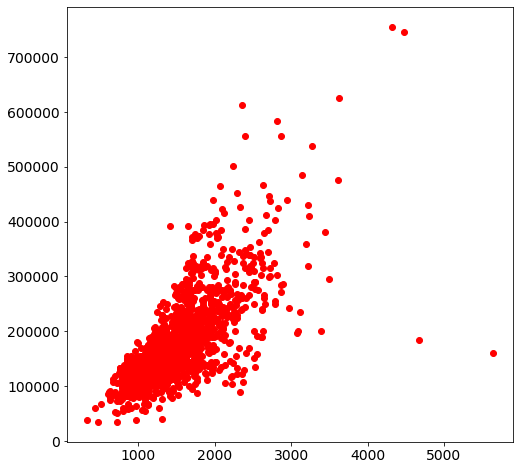

In [69]:
visualize_data(df_housing['GrLivArea'], df_housing['SalePrice'])

In [0]:
# Scale data so SF and Sale Price are on similar scales with values 
#  from 0.0 to 1.0
from sklearn.preprocessing import MinMaxScaler

sf_scaler = MinMaxScaler()
sf_scaled = sf_scaler.fit_transform(df_housing['GrLivArea'].values.reshape(-1,1).astype(np.float64))
    
price_scaler = MinMaxScaler()
price_scaled = price_scaler.fit_transform(df_housing['SalePrice'].values.reshape(-1,1).astype(np.float64))

In [0]:
# Create model using the TensorFlow Keras library
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,),
                                kernel_initializer='random_uniform',
                                bias_initializer='zeros'))

In [0]:
# Compile model
optimizer = "sgd"
model.compile(loss='mean_squared_error', optimizer=optimizer )


In [0]:
# Split the dataset into training dataset - 70%, Testing dataset - 30%
# we do this using the sklearn train_test_split method
from sklearn.model_selection import train_test_split

sf_train_scaled, sf_test_scaled, price_train_scaled, price_test_scaled = train_test_split(sf_scaled, 
                                                    price_scaled, 
                                                    test_size=0.3, random_state=42)

In [74]:
# Train model using data
initial_epochs = 8
batch_size = 10
train_hist = model.fit(sf_train_scaled, price_train_scaled, 
                       epochs=initial_epochs, batch_size=batch_size, verbose=1)

Train on 1022 samples
Epoch 1/8
1022/1022 [==============================] - 0s 288us/sample - loss: 0.0204
Epoch 2/8
1022/1022 [==============================] - 0s 133us/sample - loss: 0.0109
Epoch 3/8
1022/1022 [==============================] - 0s 123us/sample - loss: 0.0105
Epoch 4/8
1022/1022 [==============================] - 0s 124us/sample - loss: 0.0104
Epoch 5/8
1022/1022 [==============================] - 0s 124us/sample - loss: 0.0102
Epoch 6/8
1022/1022 [==============================] - 0s 114us/sample - loss: 0.0100
Epoch 7/8
1022/1022 [==============================] - 0s 124us/sample - loss: 0.0099
Epoch 8/8
1022/1022 [==============================] - 0s 124us/sample - loss: 0.0098


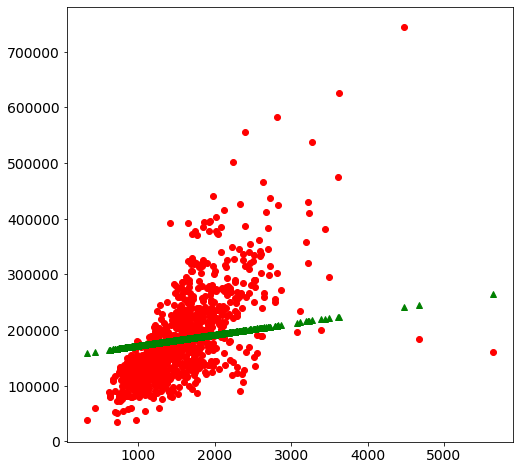

In [75]:
#our predictions versus the original data
price_predicted_scaled =  model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)

<class 'tensorflow.python.keras.callbacks.History'>


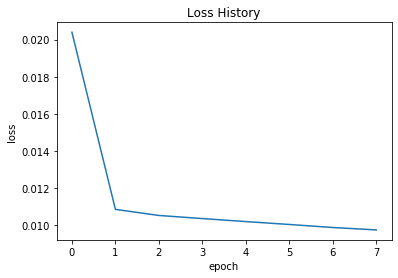

In [76]:
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

print(type(train_hist))
plot_loss(train_hist)

In [77]:
# Train model using data.  This time, train for additional epochs
# Also capture the changes over time in the history variable, train_hist_addn so we 
#   can see if loss is converging
addn_epochs = 500
train_hist_addn =model.fit(sf_train_scaled, price_train_scaled,  
                     epochs=addn_epochs, verbose=1)

Train on 1022 samples
Epoch 1/500
1022/1022 [==============================] - 0s 46us/sample - loss: 0.0096
Epoch 2/500
1022/1022 [==============================] - 0s 40us/sample - loss: 0.0096
Epoch 3/500
1022/1022 [==============================] - 0s 39us/sample - loss: 0.0096
Epoch 4/500
1022/1022 [==============================] - 0s 39us/sample - loss: 0.0095
Epoch 5/500
1022/1022 [==============================] - 0s 37us/sample - loss: 0.0095
Epoch 6/500
1022/1022 [==============================] - 0s 35us/sample - loss: 0.0094
Epoch 7/500
1022/1022 [==============================] - 0s 37us/sample - loss: 0.0094
Epoch 8/500
1022/1022 [==============================] - 0s 40us/sample - loss: 0.0094
Epoch 9/500
1022/1022 [==============================] - 0s 41us/sample - loss: 0.0093
Epoch 10/500
1022/1022 [==============================] - 0s 39us/sample - loss: 0.0093
Epoch 11/500
1022/1022 [==============================] - 0s 39us/sample - loss: 0.0092
Epoch 12/500
1022/1

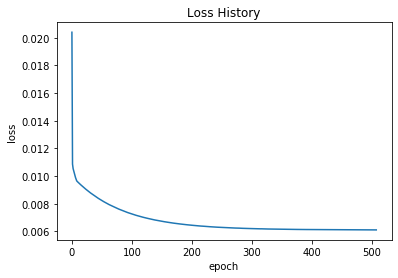

In [78]:
# add the addition epochs to the  training history
train_hist.history['loss'].extend(train_hist_addn.history['loss'])   
plot_loss(train_hist)

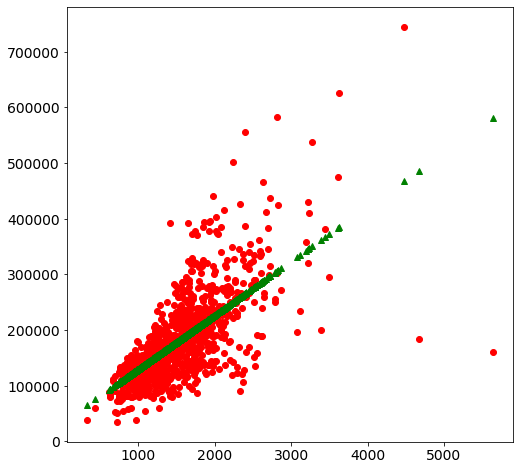

In [79]:
# Visualize data and regression line for learned weights
price_predicted_scaled =  model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), 
               price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), 
               price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)

prediction mean squared error: 0.006135712084260683

predicted Price


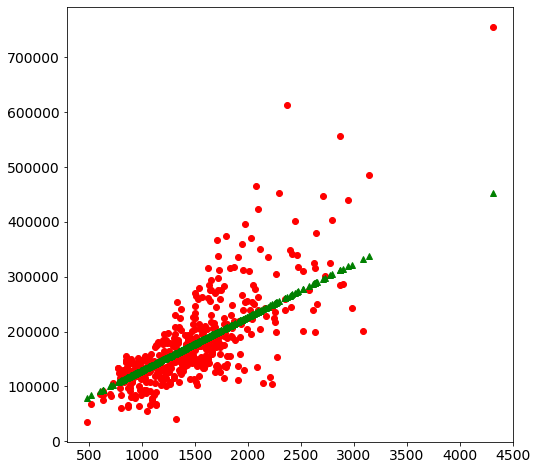

In [80]:
# Make a price prediction on data the model has never seen before, i.e. 
#    the Test data square footage
price_test_pred_scaled = model.predict(sf_test_scaled)

# calculate the mean squared error for the prediction, lower is better
from sklearn.metrics import mean_squared_error
print("prediction mean squared error:", 
          mean_squared_error(price_test_scaled, price_test_pred_scaled ))

# Visualize data
#    plus the test square footage and predicted price
print('\npredicted Price')
visualize_data(sf_scaler.inverse_transform(sf_test_scaled),
               price_scaler.inverse_transform(price_test_scaled),
               sf_scaler.inverse_transform(sf_test_scaled), 
               price_scaler.inverse_transform(price_test_pred_scaled),
               add_addn_reg_line=False)